In [1]:
!nvidia-smi

Mon Oct 12 09:22:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu


     |████████████████████████████████| 320.4MB 52kB/s 


In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/plant/train'
valid_path = '/content/drive/My Drive/plant/test'

In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [12]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/plant/train/*')

In [13]:
folders

['/content/drive/My Drive/plant/train/Tomato___Target_Spot',
 '/content/drive/My Drive/plant/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/plant/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/My Drive/plant/train/Tomato___Leaf_Mold',
 '/content/drive/My Drive/plant/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/My Drive/plant/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/plant/train/Tomato___Late_blight',
 '/content/drive/My Drive/plant/train/Tomato___healthy',
 '/content/drive/My Drive/plant/train/Tomato___Early_blight',
 '/content/drive/My Drive/plant/train/Tomato___Bacterial_spot']

In [14]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [16]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/plant/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 640 images belonging to 10 classes.


In [22]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/plant/train',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 640 images belonging to 10 classes.


In [24]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
40/40 [==============================] - 197s 5s/step - loss: 3.4314 - accuracy: 0.7172 - val_loss: 2.0284 - val_accuracy: 0.7953
Epoch 2/2
40/40 [==============================] - 10s 245ms/step - loss: 1.4596 - accuracy: 0.8250 - val_loss: 0.4947 - val_accuracy: 0.9219


In [25]:
import matplotlib.pyplot as plt

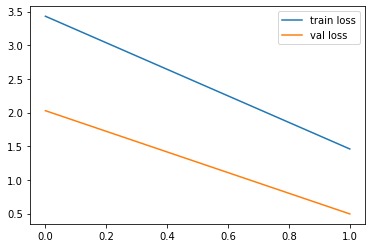

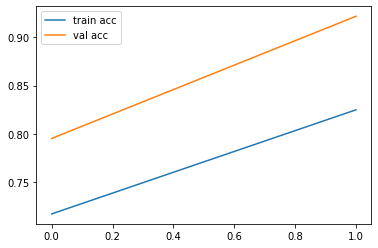

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
y_pred = model.predict(test_set)

In [28]:
y_pred

array([[1.5108074e-21, 1.4575821e-20, 2.9458325e-14, ..., 8.5893045e-20,
        1.4210718e-12, 4.1621815e-25],
       [8.1191026e-17, 2.3480529e-06, 3.3309031e-10, ..., 9.9999762e-01,
        4.3591105e-16, 7.5706529e-20],
       [1.4066005e-21, 5.5044229e-21, 2.6492050e-20, ..., 1.0000000e+00,
        1.6275769e-20, 9.0256968e-25],
       ...,
       [2.8583968e-18, 2.6401134e-14, 1.4458761e-11, ..., 8.4588315e-13,
        1.0000000e+00, 3.8527538e-17],
       [5.7526023e-31, 2.3016618e-19, 5.1187338e-24, ..., 1.0000000e+00,
        4.8414894e-27, 4.2441049e-28],
       [3.8395235e-26, 2.2222856e-11, 4.8041860e-05, ..., 1.0995017e-09,
        3.6454711e-11, 9.8118377e-01]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([4, 7, 7, 7, 2, 7, 7, 2, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 2, 4, 6,
       5, 4, 7, 0, 7, 9, 6, 7, 4, 7, 4, 4, 7, 7, 7, 2, 7, 9, 2, 7, 7, 7,
       3, 7, 7, 7, 7, 0, 1, 0, 8, 1, 7, 7, 4, 4, 7, 0, 7, 2, 4, 7, 7, 7,
       7, 6, 7, 8, 7, 6, 7, 6, 7, 7, 2, 1, 3, 7, 1, 7, 7, 6, 1, 7, 7, 8,
       7, 7, 7, 7, 7, 7, 4, 7, 4, 1, 7, 2, 1, 7, 0, 7, 4, 7, 7, 7, 4, 4,
       7, 9, 7, 4, 7, 5, 7, 7, 7, 4, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       3, 3, 5, 7, 7, 7, 1, 8, 7, 7, 7, 8, 1, 7, 8, 7, 4, 7, 7, 7, 6, 0,
       6, 7, 4, 7, 7, 0, 6, 7, 7, 5, 7, 3, 7, 8, 3, 2, 7, 4, 5, 7, 1, 7,
       7, 7, 8, 2, 7, 7, 7, 7, 7, 7, 6, 2, 7, 5, 7, 3, 1, 7, 1, 8, 7, 9,
       6, 7, 3, 7, 7, 7, 7, 9, 7, 7, 8, 8, 1, 7, 7, 1, 7, 8, 0, 7, 3, 7,
       7, 7, 7, 7, 7, 2, 7, 2, 5, 0, 7, 3, 7, 7, 4, 7, 5, 2, 2, 3, 7, 6,
       7, 6, 0, 9, 5, 7, 8, 0, 1, 1, 7, 5, 7, 3, 9, 7, 7, 7, 7, 7, 7, 7,
       4, 7, 3, 7, 7, 0, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 0, 7,
       4, 6, 9, 7, 7, 0, 3, 7, 5, 4, 7, 1, 7, 7, 8,